<a href="https://colab.research.google.com/github/pavannayak9398/Machine-Learning/blob/main/Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telco Customer Churn Prediction**

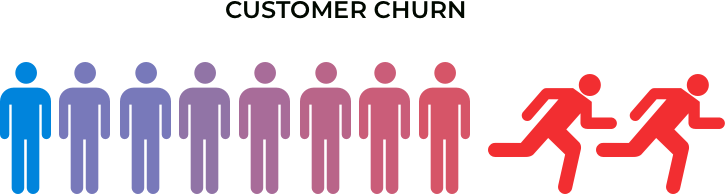

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/FSDS @Kodi Senapati/Colab files/Datasets/Telco-Customer-Churn.csv")

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
21


**2. Find Irrelevant Columns & Drop**

In [ ]:
# Find the values with single values and remove

one=[i for i in df.columns if df[i].nunique()==1]

print(one)

[]


In [ ]:
# Drop "customerID" as it is of no use

df=df.drop(['customerID'], axis=1)
print(df.columns)
print(len(df.columns))

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**3. Convert categorical columns to Numeric type if applicable**

In [ ]:
# TotalCharges is of object type convert to numeric


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()


11

In [ ]:
#df[col] = df[col].method(value)

df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
print(df['TotalCharges'].isnull().sum())
print(df['TotalCharges'].info())

0
<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB
None


**4. Check for NULL Values**

In [ ]:
# Check for anyother Null values


df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**5. Separate categorical and numerical features for appropriate preprocessing.**

* **Binary Categorical:** Use LabelEncoder.
* **Multi-Class Categorical:** Use pd.get_dummies() or OneHotEncoder.

**Note:** Check wether the binary value is Ordinal or Not to apply LabelEncoder


In [ ]:
# Identify the categorical column with binary and multi value

categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
binary_col=[i for i in categorical_cols if df[i].nunique() == 2]
multi_col=[i for i in categorical_cols if df[i].nunique() > 2]

print(categorical_cols)
print(len(categorical_cols))
print(binary_col)
print(len(binary_col))
print(multi_col)
print(len(multi_col))

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
16
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
6
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
10


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in binary_col:
  df[i]=le.fit_transform(df[i])

df=pd.get_dummies(df, columns=multi_col, dtype=int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


**6. Class Imbalance validation**

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


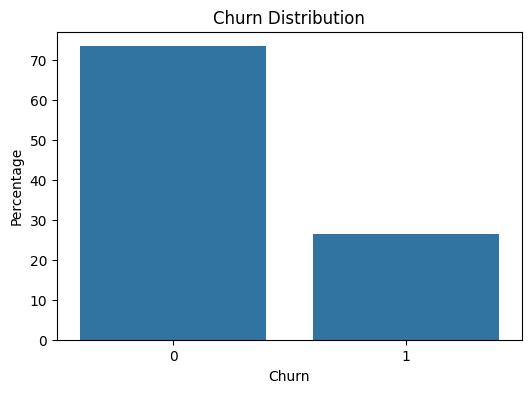

In [ ]:
# Check for Imbalance

# Count the number of Churn and non Churn employees
churn_count=df['Churn'].value_counts(normalize=True) * 100
print(churn_count)

plt.figure(figsize=(6,4))
sns.barplot(x=churn_count.index, y=churn_count.values)
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.title("Churn Distribution")
plt.show()

In [ ]:
# Balance the class using SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target variable
X=df.drop('Churn', axis=1)
y=df['Churn']

# Display original class distribution
print("Original class Distribution:", Counter(y))

#Apply SMOTE
smote=SMOTE(sampling_strategy=1, random_state=42)
X_re, y_re = smote.fit_resample(X,y)

# Display new balanced class distribution
print("New Balanced class Distribution:", Counter(y_re))

# Convert back to Dataframe
df_re=pd.DataFrame(X_re, columns=X.columns)
df_re['Churn']= y_re

Original class Distribution: Counter({0: 5174, 1: 1869})
New Balanced class Distribution: Counter({0: 5174, 1: 5174})


Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


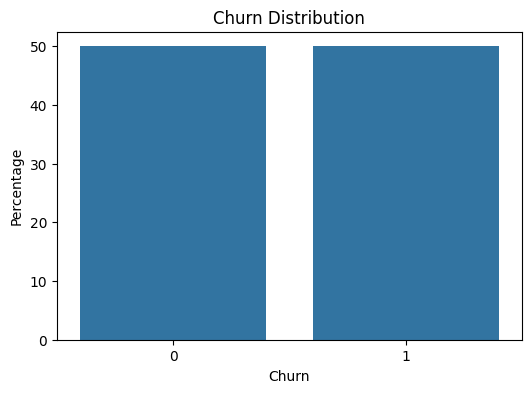

In [ ]:
# Check for Imbalance

# Count the number of Churn and non Churn employees
churn_count=df_re['Churn'].value_counts(normalize=True) * 100
print(churn_count)

plt.figure(figsize=(6,4))
sns.barplot(x=churn_count.index, y=churn_count.values)
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.title("Churn Distribution")
plt.show()

**7. Apply Algorithms that can be applicable**

In [ ]:
# Split to Feature and Target Clomuns

X=df_re.drop('Churn', axis=1)
y=df_re['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2 ,random_state=42)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

**8. Function for Evaluation**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  y_proba=model.predict_proba(X_test)[:,1]

  # Accuracy and Classification Report
  print(f"Model:{model.__class__.__name__}")
  print("Accuracy:", accuracy_score(y_test,y_pred))
  print("Classification Report: \n", classification_report(y_test, y_pred))

  # AUC ROC
  auc=roc_auc_score(y_test, y_proba)
  print("AUC-ROC:", auc)

  # Plot ROC Curve
  fpr, tpr, thresholds=roc_curve(y_test, y_proba)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()





Model:RandomForestClassifier
Accuracy: 0.8579710144927536
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1021
           1       0.88      0.84      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

AUC-ROC: 0.9344494873621535


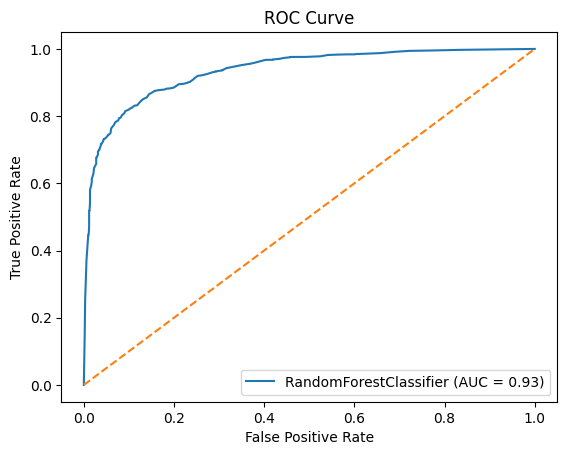

In [ ]:
# 8.1 Random Forest


rf=RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:16:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model:XGBClassifier
Accuracy: 0.8492753623188406
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1021
           1       0.86      0.84      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

AUC-ROC: 0.9345013066873072


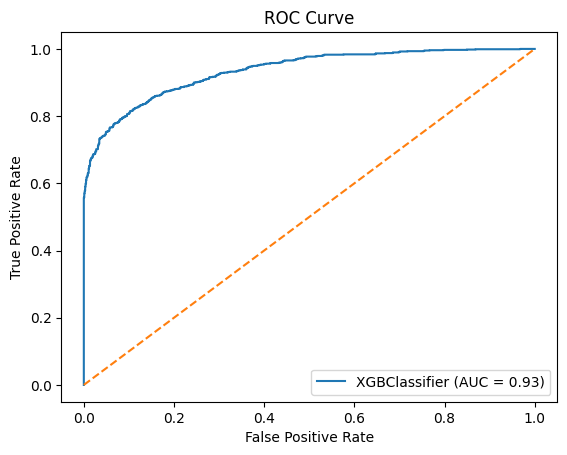

In [ ]:
# 8.2 XGBoost


xgb=XGBClassifier(use_label_encoder=False, eval_metrics='logloss', random_state=42)
evaluate_model(xgb, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765
Model:LGBMClassifier
Accuracy: 0.8623188405797102
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1021
           1       0.87      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       

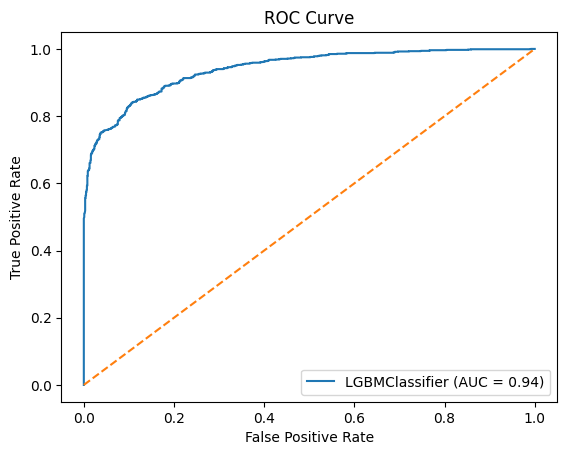

In [ ]:
# 8.3  LightGBM


lgbm=LGBMClassifier(random_state=42)
evaluate_model(lgbm, X_train, X_test, y_train, y_test)

Model:KNeighborsClassifier
Accuracy: 0.7792270531400967
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76      1021
           1       0.75      0.84      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

AUC-ROC: 0.8448781498913661


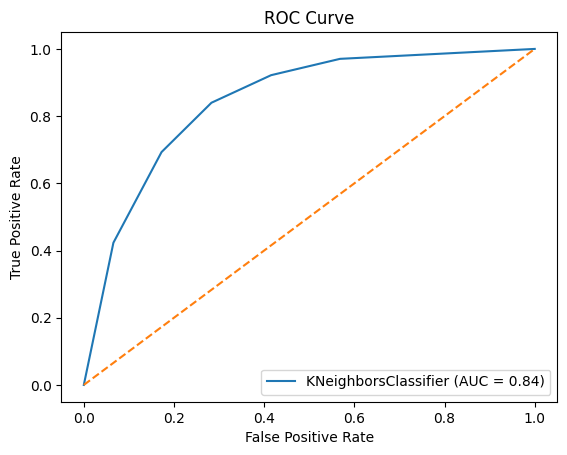

In [ ]:
# 8.4 K-Nearest Neighbors(KNN)


knn=KNeighborsClassifier()
evaluate_model(knn, X_train, X_test, y_train, y_test)

Model:CatBoostClassifier
Accuracy: 0.8613526570048309
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1021
           1       0.87      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

AUC-ROC: 0.9417153970620777


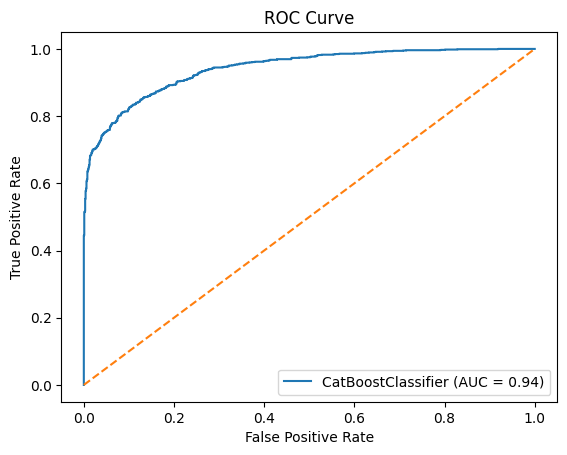

In [ ]:
# 8.5 CatBoost


catboost=CatBoostClassifier(verbose=0, random_state=42)
evaluate_model(catboost, X_train, X_test, y_train, y_test)

**9. Hyperparameter Tuning using GridSearchCV for LightGBM**

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

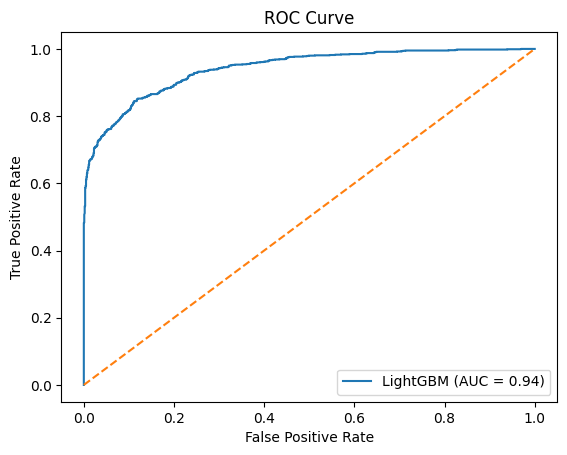

In [ ]:
param_grid={
    'n_estimators':[100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit on Training Data
grid_search.fit(X_train, y_train)

# Display Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

# Get the Best Model
best_lgbm = grid_search.best_estimator_

# Train and Evaluate
best_lgbm.fit(X_train, y_train)
y_pred = best_lgbm.predict(X_test)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]

#Accuracy and Classification Report
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("Final Model Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
final_auc = roc_auc_score(y_test, y_proba)
print("Final Model AUC-ROC:", final_auc)


# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {final_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**10. Hyperparameter Tuning for CatBoost**

In [ ]:
'''param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}'''

param_grid={
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [3, 5],
    'subsample': [0.8, 1.0]
 }

# GridSearchCV
grid_search = GridSearchCV(estimator=catboost,
                           param_grid=param_grid,
                           cv=3,
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)

# Fit on Training Data
grid_search.fit(X_train, y_train)

# Display Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'subsample': 0.8}
Best AUC-ROC Score: 0.9388786247947222


Final Model Accuracy: 0.8599033816425121
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1021
           1       0.87      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Final Model AUC-ROC: 0.9416215620678805


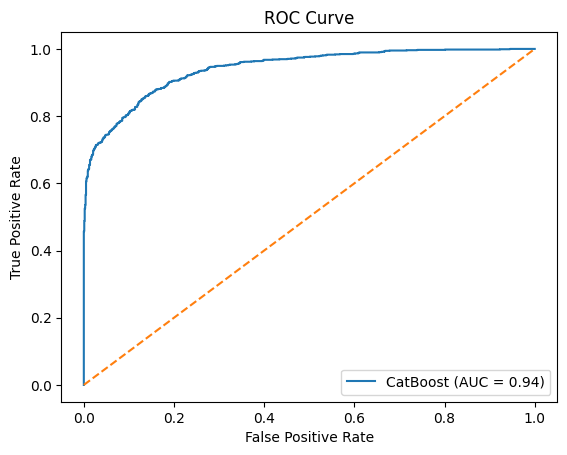

In [ ]:
# Get the Best Model
best_catboost = grid_search.best_estimator_

# Train and Evaluate
best_catboost.fit(X_train, y_train)
y_pred = best_catboost.predict(X_test)
y_proba = best_catboost.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("Final Model Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
final_auc = roc_auc_score(y_test, y_proba)
print("Final Model AUC-ROC:", final_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {final_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## **Summary of Results for Telco Churn Prediction**

1. **Initial Model Performance:**

* LGBMClassifier: Accuracy = 0.8623, AUC-ROC = 0.9408
* CatBoostClassifier: Accuracy = 0.8613, AUC-ROC = 0.9417

Both models performed well with high AUC-ROC values, indicating excellent classification capability.

2. **Hyperparameter Tuning:**
  
*  LGBMClassifier:
  * Final Accuracy = 0.8604, Final AUC-ROC = 0.9409
  * The model maintained high accuracy and AUC-ROC with improved stability.
* CatBoostClassifier:
  * Final Accuracy = 0.8599, Final AUC-ROC = 0.9416
  * Although slightly lower in accuracy, the AUC-ROC remained high, ensuring robust classification.

3. **Model Selection:**

* Both models showed competitive performance, but CatBoost had a marginally higher AUC-ROC.
* CatBoostClassifier was chosen as the final model for its balanced precision and recall scores, reflecting better generalization.